In [9]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
from sklearn.metrics import precision_score, recall_score

In [3]:
# 1️⃣ Load dataset (CIFAR-10 has 10 classes & 60,000 images)
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 11s 0us/step


In [4]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)
datagen.fit(x_train)

In [5]:
# 4️⃣ Build improved CNN
model = models.Sequential()

# Conv Block 1
model.add(layers.Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))

# Conv Block 2
model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))

# Conv Block 3
model.add(layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))

# Fully connected
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
# 5️⃣ Compile
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# 6️⃣ Train (fewer epochs, but higher accuracy due to augmentation)
model.fit(datagen.flow(x_train, y_train, batch_size=64),
          epochs=10,
          validation_data=(x_test, y_test),
          verbose=1)

# 7️⃣ Evaluate
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc:.2f}")

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 362s 455ms/step - accuracy: 0.7449 - loss: 0.7450 - val_accuracy: 0.7819 - val_loss: 0.6438
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 354s 453ms/step - accuracy: 0.7523 - loss: 0.7210 - val_accuracy: 0.7619 - val_loss: 0.6879
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 354s 453ms/step - accuracy: 0.7589 - loss: 0.7078 - val_accuracy: 0.7766 - val_loss: 0.6594
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 346s 442ms/step - accuracy: 0.7677 - loss: 0.6774 - val_accuracy: 0.7728 - val_loss: 0.6732
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 352s 450ms/step - accuracy: 0.7750 - loss: 0.6596 - val_accuracy: 0.7372 - val_loss: 0.7724
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 352s 450ms/step - accuracy: 0.7764 - loss: 0.6494 - val_accuracy: 0.7906 - val_loss: 0.5960
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 351s 449ms/step - accuracy: 0.7815 - loss: 0.6422 - val_accuracy: 0.7877 - val_loss: 0.6312
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 376s 442ms/step - accuracy: 0.7817 -

In [10]:
# 8️⃣ Calculate Precision and Recall
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

precision = precision_score(y_true_classes, y_pred_classes, average='macro')
recall = recall_score(y_true_classes, y_pred_classes, average='macro')

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 15s 47ms/step
Precision: 0.80
Recall: 0.78


In [11]:
from google.colab import files
from tensorflow.keras.preprocessing import image
import numpy as np

uploaded = files.upload()

for fn in uploaded.keys():
  # Load the image
  path = fn
  img = image.load_img(path, target_size=(32, 32))
  img_array = image.img_to_array(img)
  img_array = np.expand_dims(img_array, axis=0) # Create a batch
  img_array /= 255.0 # Normalize the image

  # Make a prediction
  predictions = model.predict(img_array)
  predicted_class_index = np.argmax(predictions, axis=1)[0]
  predicted_class_name = class_names[predicted_class_index]

  # Display the image and prediction
  plt.imshow(img)
  plt.title(f"Predicted: {predicted_class_name}")
  plt.axis('off')
  plt.show()

Saving download.jpg to download.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


NameError: name 'class_names' is not defined

In [12]:
# Define the class names for CIFAR-10
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

Saving download.jpg to download (1).jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


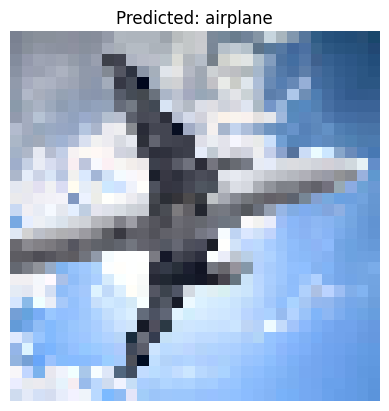

In [13]:
import matplotlib.pyplot as plt
from google.colab import files
from tensorflow.keras.preprocessing import image
import numpy as np

uploaded = files.upload()

for fn in uploaded.keys():
  # Load the image
  path = fn
  img = image.load_img(path, target_size=(32, 32))
  img_array = image.img_to_array(img)
  img_array = np.expand_dims(img_array, axis=0) # Create a batch
  img_array /= 255.0 # Normalize the image

  # Make a prediction
  predictions = model.predict(img_array)
  predicted_class_index = np.argmax(predictions, axis=1)[0]
  predicted_class_name = class_names[predicted_class_index]

  # Display the image and prediction
  plt.imshow(img)
  plt.title(f"Predicted: {predicted_class_name}")
  plt.axis('off')
  plt.show()